In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import zscore 
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, chi2
df = pd.read_excel('Sports Data.xlsx',sheet_name= 'Sports data for DSBA')

In [103]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [104]:
df.isna().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [106]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Game_number,2930,2930,Game_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Result,2930,2,Win,2457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_team_Age,2833.0,NaN,NaN,NaN,29.242852,2.26423,12.0,30.0,30.0,30.0,70.0
Match_light_type,2878,3,Day,2041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_format,2860,4,ODI,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bowlers_in_team,2848.0,NaN,NaN,NaN,2.913624,1.023907,1.0,2.0,3.0,4.0,5.0
Wicket_keeper_in_team,2930.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
All_rounder_in_team,2890.0,NaN,NaN,NaN,2.722491,1.092699,1.0,2.0,3.0,4.0,4.0
First_selection,2871,3,Bowling,1722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opponent,2894,9,South Africa,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
for i in df:
    print(i,':',df[i].unique())
    print(df[i].value_counts())
    print('---------------------------')

Game_number : ['Game_1' 'Game_2' 'Game_3' ... 'Game_2928' 'Game_2929' 'Game_2930']
Game_1       1
Game_1947    1
Game_1949    1
Game_1950    1
Game_1951    1
            ..
Game_979     1
Game_980     1
Game_981     1
Game_982     1
Game_2930    1
Name: Game_number, Length: 2930, dtype: int64
---------------------------
Result : ['Loss' 'Win']
Win     2457
Loss     473
Name: Result, dtype: int64
---------------------------
Avg_team_Age : [18. 24. nan 17. 12. 25. 26. 27. 28. 29. 30. 70. 69. 50.]
30.0    2203
24.0     184
29.0     131
27.0      92
28.0      92
26.0      74
25.0      50
70.0       2
18.0       1
17.0       1
12.0       1
69.0       1
50.0       1
Name: Avg_team_Age, dtype: int64
---------------------------
Match_light_type : ['Day' 'Day and Night' nan 'Night']
Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64
---------------------------
Match_format : ['ODI' 'T20' 'Test' '20-20' nan]
ODI      1865
T20       864
Test    

In [108]:
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False)

Avg_team_Age            97
Bowlers_in_team         82
Audience_number         81
Match_format            70
Offshore                64
Season                  62
First_selection         59
Match_light_type        52
All_rounder_in_team     40
Opponent                36
Max_run_given_1over     34
Extra_bowls_bowled      29
Max_run_scored_1over    28
player_highest_run      28
Min_run_scored_1over    27
dtype: int64

In [109]:
mode1=df["Match_light_type"].mode().values[0]
mode2=df["Match_format"].mode().values[0]
mode3=df["First_selection"].mode().values[0]
mode4=df["Opponent"].mode().values[0]
mode5=df["Season"].mode().values[0]
mode6=df['Offshore'].mode().values[0]


df["Match_light_type"]=df["Match_light_type"].replace(np.nan,mode1)
df["Match_format"]= df["Match_format"].replace(np.nan,mode2)
df["First_selection"]=df["First_selection"].replace(np.nan,mode3)
df["Opponent"]=df["Opponent"].replace(np.nan,mode4)
df["Season"]=df["Season"].replace(np.nan,mode5)
df["Offshore"]=df["Offshore"].replace(np.nan,mode6)

In [110]:
median1=df["Avg_team_Age"].median()
median2=df["Bowlers_in_team"].median()
median3=df["All_rounder_in_team"].median()
median4=df["Audience_number"].median()
median5=df["Max_run_scored_1over"].median()
median6=df["Extra_bowls_bowled"].median()
median7=df["Min_run_scored_1over"].median()
median8=df["Max_run_given_1over"].median()
median9=df["player_highest_run"].median()

df["Avg_team_Age"].replace(np.nan,median1,inplace=True)
df["Bowlers_in_team"].replace(np.nan,median2,inplace=True)
df["All_rounder_in_team"].replace(np.nan,median3,inplace=True)
df["Audience_number"].replace(np.nan,median4,inplace=True)
df["Max_run_scored_1over"].replace(np.nan,median5,inplace=True)
df["Extra_bowls_bowled"].replace(np.nan,median6,inplace=True)
df["Min_run_scored_1over"].replace(np.nan,median7,inplace=True)
df["Max_run_given_1over"].replace(np.nan,median8,inplace=True)
df["player_highest_run"].replace(np.nan,median9,inplace=True)

In [111]:
df.isna().sum()

Game_number               0
Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

In [112]:
df['Players_scored_zero'].replace(to_replace='Three', value=3, inplace=True)
df.Players_scored_zero.value_counts()

3    1735
2     744
4     285
1     166
Name: Players_scored_zero, dtype: int64

In [113]:
df['Players_scored_zero'].replace(to_replace='3', value=3, inplace=True)
df.Players_scored_zero.value_counts()

3    1735
2     744
4     285
1     166
Name: Players_scored_zero, dtype: int64

In [114]:
df['player_highest_wicket'].replace(to_replace='Three', value=3, inplace=True)
df['player_highest_wicket'].replace(to_replace='3', value=3, inplace=True)
df.player_highest_wicket.value_counts()

1    1084
2    1063
3     434
4     211
5     138
Name: player_highest_wicket, dtype: int64

In [115]:
df.Match_format.value_counts()

ODI      1935
T20       864
Test      125
20-20       6
Name: Match_format, dtype: int64

In [116]:
df['Match_format'].replace(to_replace='20-20', value='T20', inplace=True)
df.Match_format.value_counts()

ODI     1935
T20      870
Test     125
Name: Match_format, dtype: int64

In [117]:
df.First_selection.value_counts()

Bowling    1781
Batting    1138
Bat          11
Name: First_selection, dtype: int64

In [118]:
df['First_selection'].replace(to_replace='Bat', value='Batting', inplace=True)
df.First_selection.value_counts()

Bowling    1781
Batting    1149
Name: First_selection, dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2930 non-null   float64
 3   Match_light_type        2930 non-null   object 
 4   Match_format            2930 non-null   object 
 5   Bowlers_in_team         2930 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2930 non-null   float64
 8   First_selection         2930 non-null   object 
 9   Opponent                2930 non-null   object 
 10  Season                  2930 non-null   object 
 11  Audience_number         2930 non-null   float64
 12  Offshore                2930 non-null   object 
 13  Max_run_scored_1over    2930 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

# Univariate Analysis

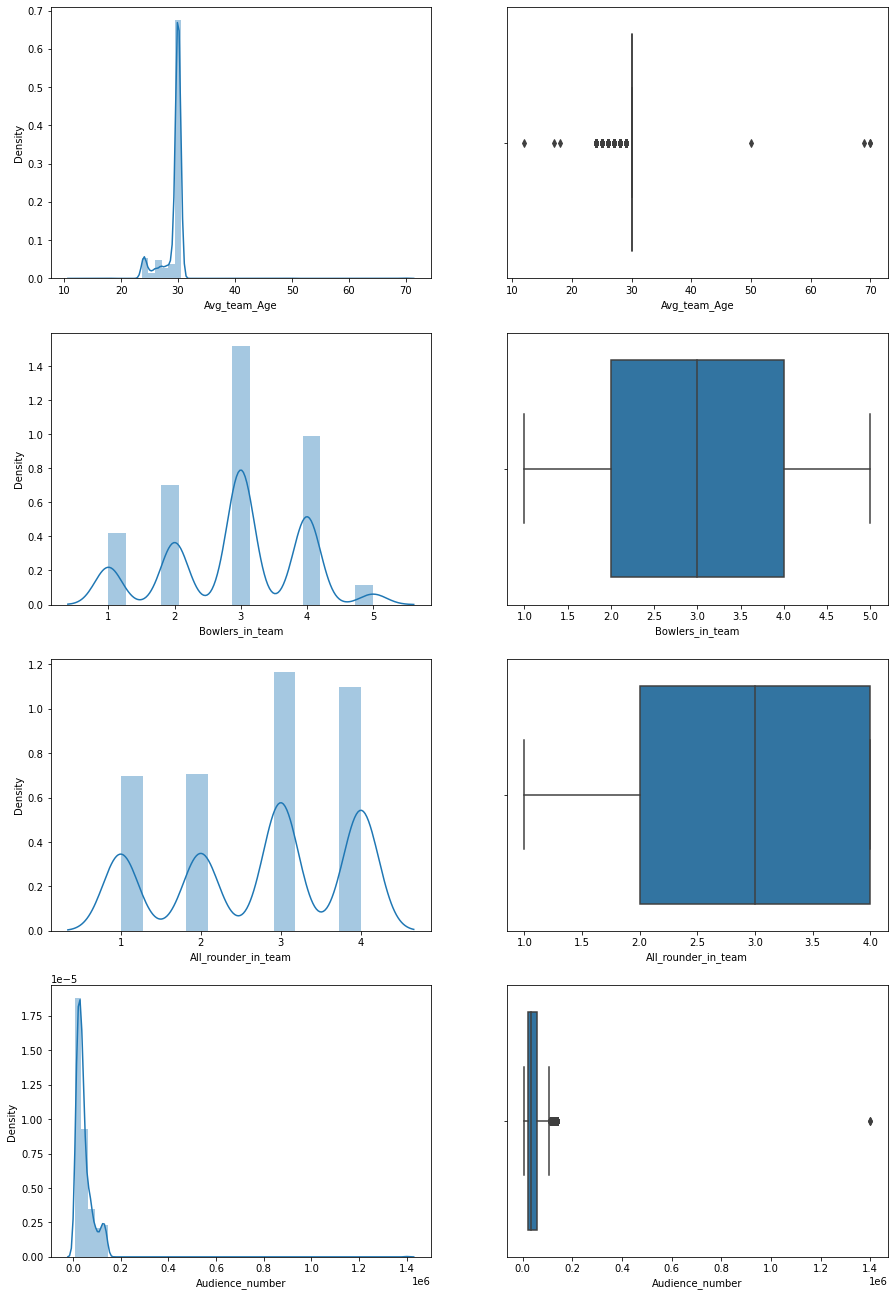

In [120]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,23)
a = sns.distplot(df['Avg_team_Age'] , ax=axes[0][0])
a = sns.boxplot(df['Avg_team_Age'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(df['Bowlers_in_team'], ax=axes[1][0])
a=sns.boxplot(df['Bowlers_in_team'],orient="v", ax=axes[1][1])

a=sns.distplot(df['All_rounder_in_team'], ax=axes[2][0])
a=sns.boxplot(df['All_rounder_in_team'],orient="v", ax=axes[2][1])

a=sns.distplot(df['Audience_number'], ax=axes[3][0])
a=sns.boxplot(df['Audience_number'],orient="v", ax=axes[3][1])

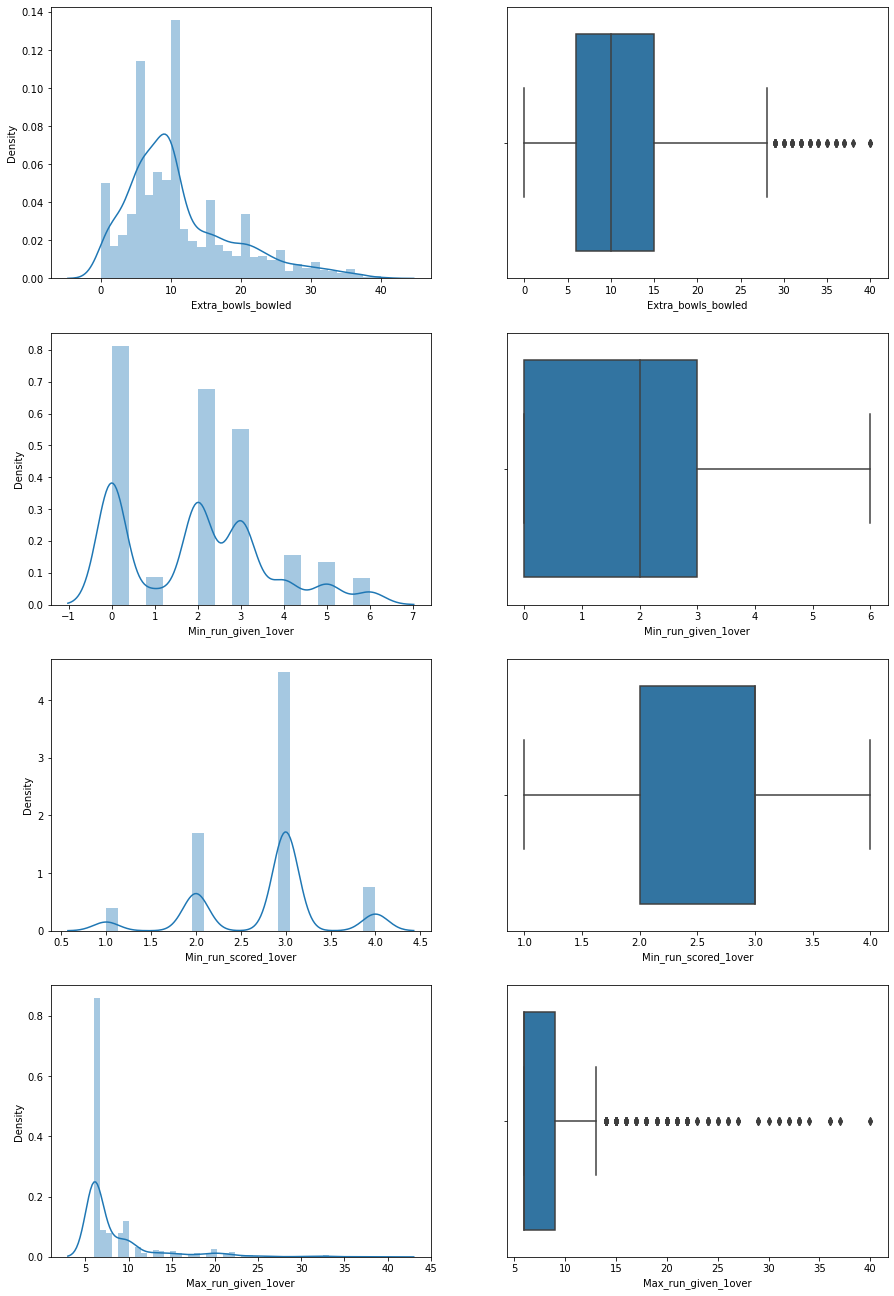

In [121]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,23)


a = sns.distplot(df['Extra_bowls_bowled'] , ax=axes[0][0])
a = sns.boxplot(df['Extra_bowls_bowled'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(df['Min_run_given_1over'], ax=axes[1][0])
a=sns.boxplot(df['Min_run_given_1over'],orient="v", ax=axes[1][1])

a=sns.distplot(df['Min_run_scored_1over'], ax=axes[2][0])
a=sns.boxplot(df['Min_run_scored_1over'],orient="v", ax=axes[2][1])

a=sns.distplot(df['Max_run_given_1over'], ax=axes[3][0])
a=sns.boxplot(df['Max_run_given_1over'],orient="v", ax=axes[3][1])

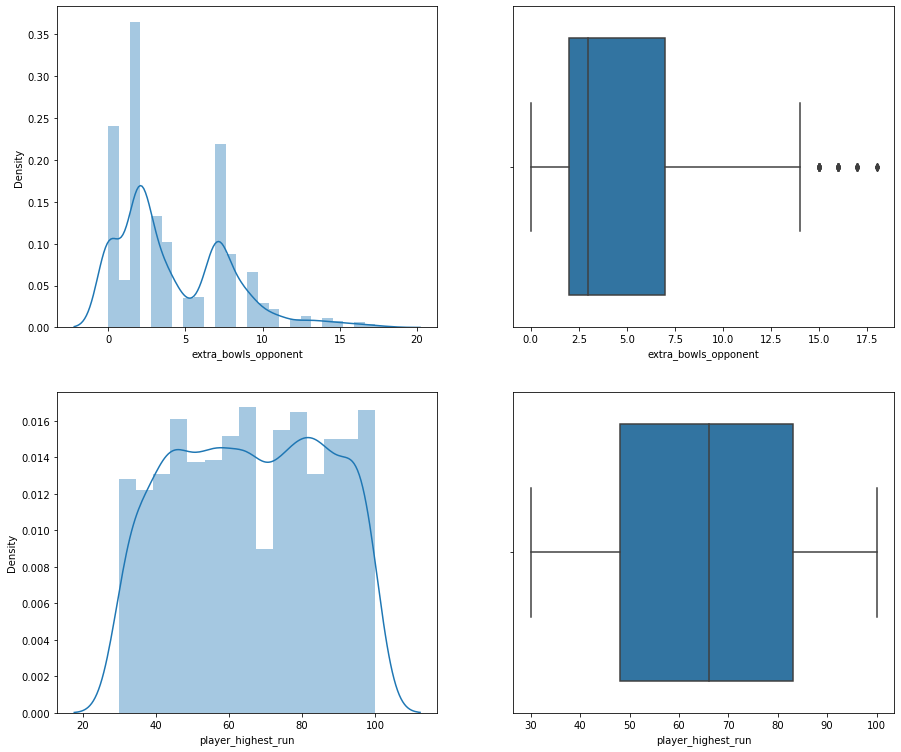

In [122]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,13)

a = sns.distplot(df['extra_bowls_opponent'] , ax=axes[0][0])
a = sns.boxplot(df['extra_bowls_opponent'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(df['player_highest_run'], ax=axes[1][0])
a=sns.boxplot(df['player_highest_run'],orient="v", ax=axes[1][1])

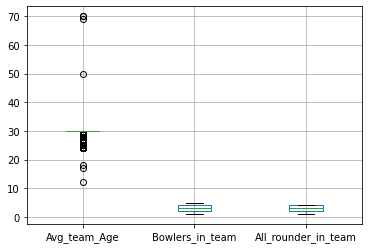

In [123]:
df.boxplot(column=['Avg_team_Age' , 'Bowlers_in_team','All_rounder_in_team'])
plt.show()

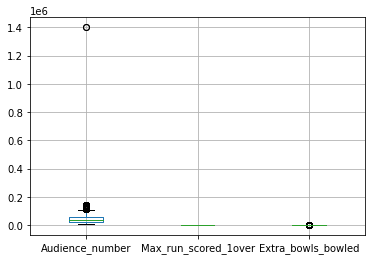

In [124]:
df.boxplot(column=['Audience_number','Max_run_scored_1over','Extra_bowls_bowled'])
plt.show()

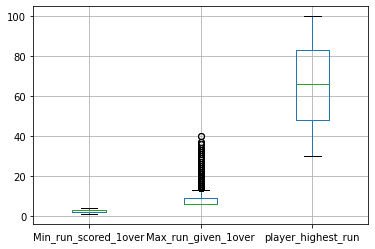

In [125]:
df.boxplot(column=['Min_run_scored_1over','Max_run_given_1over','player_highest_run'])
plt.show()

In [126]:
df["Players_scored_zero"]= pd.Categorical(df['Players_scored_zero'])
df['player_highest_wicket']=pd.Categorical(df['player_highest_wicket'])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Game_number             2930 non-null   object  
 1   Result                  2930 non-null   object  
 2   Avg_team_Age            2930 non-null   float64 
 3   Match_light_type        2930 non-null   object  
 4   Match_format            2930 non-null   object  
 5   Bowlers_in_team         2930 non-null   float64 
 6   Wicket_keeper_in_team   2930 non-null   int64   
 7   All_rounder_in_team     2930 non-null   float64 
 8   First_selection         2930 non-null   object  
 9   Opponent                2930 non-null   object  
 10  Season                  2930 non-null   object  
 11  Audience_number         2930 non-null   float64 
 12  Offshore                2930 non-null   object  
 13  Max_run_scored_1over    2930 non-null   float64 
 14  Max_wicket_taken_1over  

# Univariate for Categorical variable

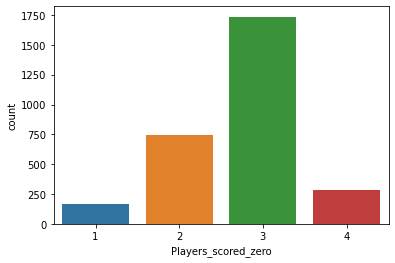

In [128]:
sns.countplot(x="Players_scored_zero", data=df);

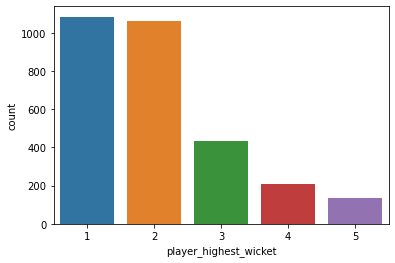

In [129]:
sns.countplot(x="player_highest_wicket", data=df);

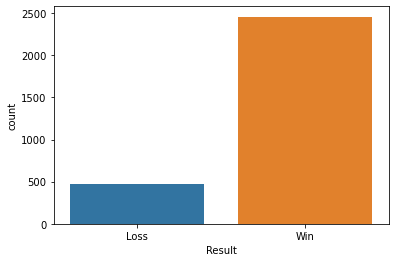

In [130]:
sns.countplot(x='Result', data=df);

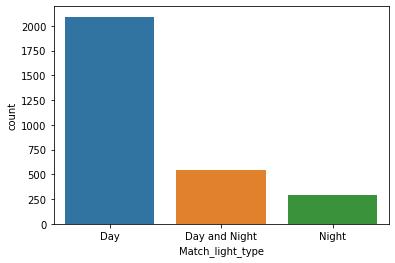

In [131]:
sns.countplot(df['Match_light_type']);

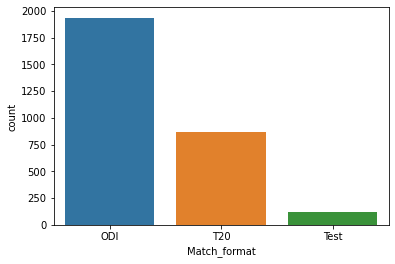

In [132]:
sns.countplot(df['Match_format']);

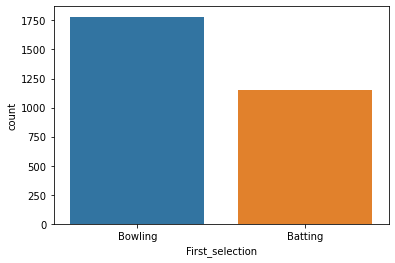

In [133]:
sns.countplot(x='First_selection', data=df);

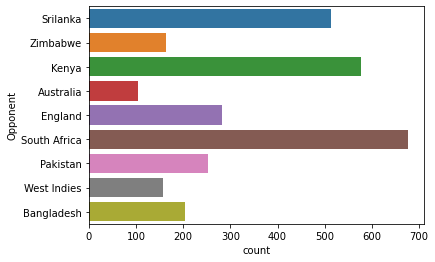

In [134]:

sns.countplot(y='Opponent', data=df);

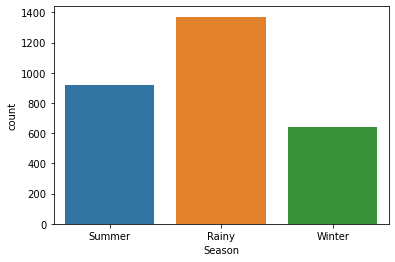

In [135]:
sns.countplot(x='Season', data=df);

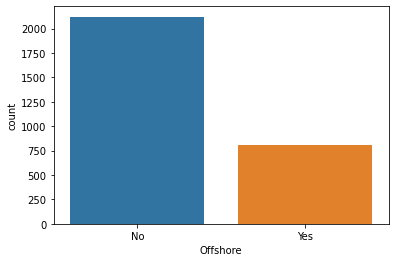

In [136]:
sns.countplot(x='Offshore', data=df);

# Bivariate Analysis for numerical variable

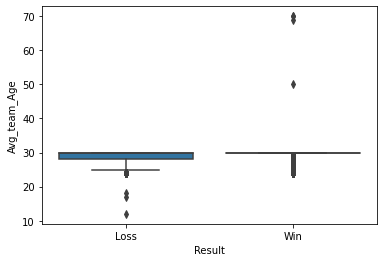

In [137]:
sns.boxplot(y='Avg_team_Age',x='Result', data=df);

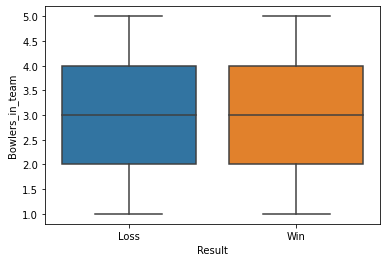

In [138]:
sns.boxplot(x='Result',y='Bowlers_in_team', data=df);

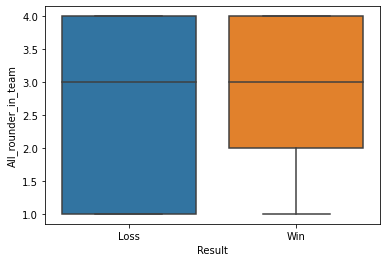

In [139]:

sns.boxplot(x='Result',y='All_rounder_in_team', data=df);

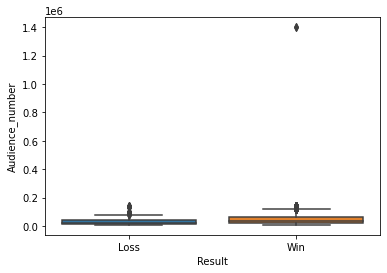

In [140]:
sns.boxplot(x='Result',y='Audience_number', data=df);

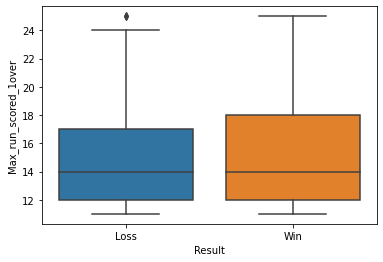

In [141]:
sns.boxplot(x='Result',y='Max_run_scored_1over', data=df);

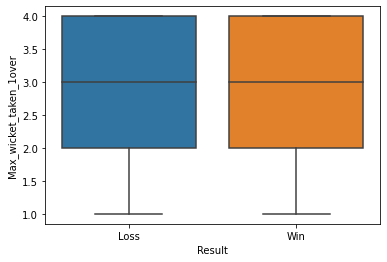

In [142]:
sns.boxplot(x='Result',y='Max_wicket_taken_1over', data=df);

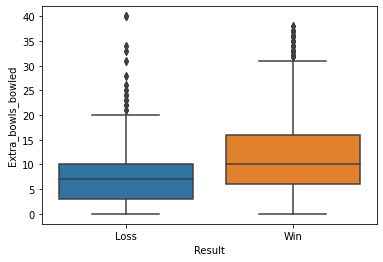

In [143]:
sns.boxplot(x='Result',y='Extra_bowls_bowled', data=df);

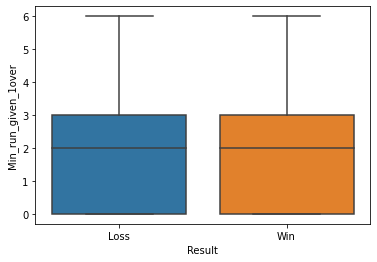

In [144]:
sns.boxplot(x='Result',y='Min_run_given_1over', data=df);

<AxesSubplot:xlabel='Result', ylabel='Min_run_scored_1over'>

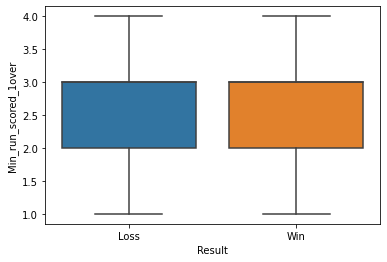

In [145]:
sns.boxplot(x='Result',y='Min_run_scored_1over', data=df)

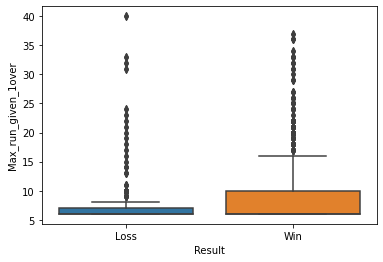

In [146]:
sns.boxplot(x='Result',y='Max_run_given_1over', data=df);

<AxesSubplot:xlabel='Result', ylabel='extra_bowls_opponent'>

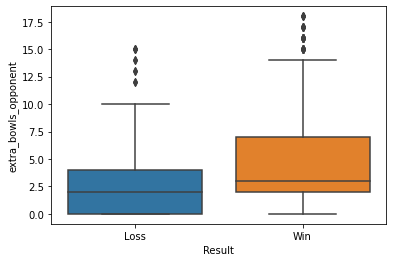

In [147]:
sns.boxplot(x='Result',y='extra_bowls_opponent', data=df)

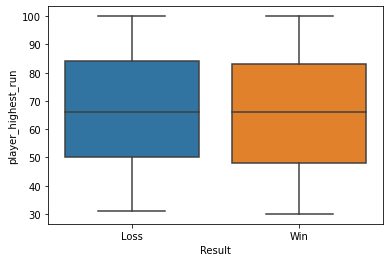

In [148]:
sns.boxplot(x='Result',y='player_highest_run', data=df);

# For Categorical Variable

In [149]:
pd.crosstab(index=df.Match_light_type,columns=df.Result)


Result,Loss,Win
Match_light_type,,
Day,314,1779
Day and Night,135,406
Night,24,272


In [150]:
pd.crosstab(index=df.Match_format,columns=df.Result)


Result,Loss,Win
Match_format,,
ODI,269,1666
T20,180,690
Test,24,101


In [151]:
pd.crosstab(index=df.First_selection,columns=df.Result)


Result,Loss,Win
First_selection,,
Batting,172,977
Bowling,301,1480


In [152]:
pd.crosstab(index=df.Opponent,columns=df.Result)

Result,Loss,Win
Opponent,,
Australia,24,80
Bangladesh,10,194
England,18,265
Kenya,93,483
Pakistan,17,236
South Africa,117,559
Srilanka,124,389
West Indies,4,154
Zimbabwe,66,97


In [153]:
pd.crosstab(index=df.Season,columns=df.Result)


Result,Loss,Win
Season,,
Rainy,170,1201
Summer,238,680
Winter,65,576


In [154]:
pd.crosstab(index=df.Offshore,columns=df.Result)


Result,Loss,Win
Offshore,,
No,227,1894
Yes,246,563


In [155]:
pd.crosstab(index=df.Players_scored_zero,columns=df.Result)

Result,Loss,Win
Players_scored_zero,,
1,56,110
2,141,603
3,250,1485
4,26,259


In [156]:
pd.crosstab(index=df.player_highest_wicket,columns=df.Result)


Result,Loss,Win
player_highest_wicket,,
1,286,798
2,104,959
3,63,371
4,10,201
5,10,128


# Multivariate Analysis

<AxesSubplot:>

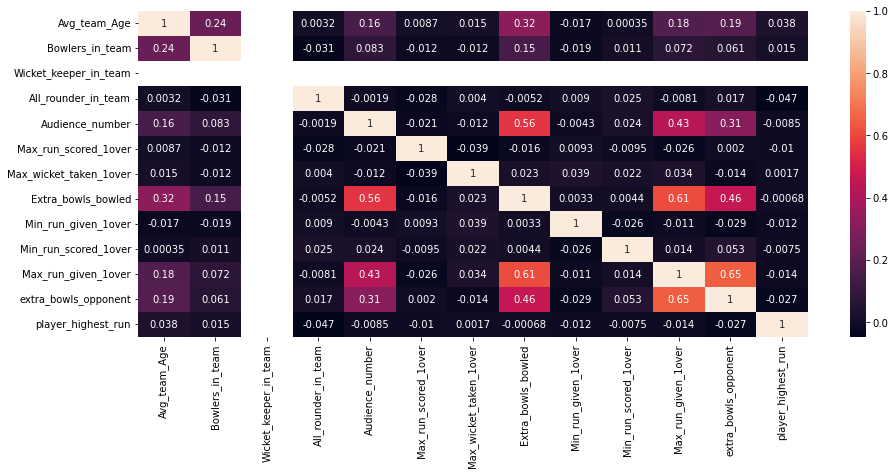

In [157]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

# Outlier Treatment

In [158]:
# Let's remove unwanted column first
df['Result']=pd.Categorical(df['Result']).codes
df['Result'].value_counts()

1    2457
0     473
Name: Result, dtype: int64

In [159]:
df['First_selection']=pd.Categorical(df['First_selection']).codes
df['First_selection'].value_counts()

1    1781
0    1149
Name: First_selection, dtype: int64

In [160]:
df['Offshore']=pd.Categorical(df['Offshore']).codes
df['Offshore'].value_counts()

0    2121
1     809
Name: Offshore, dtype: int64

In [161]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,0,18.0,Day,ODI,3.0,1,3.0,1,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,1,24.0,Day,T20,3.0,1,4.0,0,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,0,24.0,Day and Night,T20,3.0,1,2.0,1,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,1,24.0,Day,ODI,2.0,1,2.0,1,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,0,24.0,Night,ODI,1.0,1,3.0,1,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [162]:
df_1=df.copy()
df_1.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,0,18.0,Day,ODI,3.0,1,3.0,1,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,1,24.0,Day,T20,3.0,1,4.0,0,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,0,24.0,Day and Night,T20,3.0,1,2.0,1,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,1,24.0,Day,ODI,2.0,1,2.0,1,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,0,24.0,Night,ODI,1.0,1,3.0,1,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [163]:
df_1=pd.get_dummies(df_1,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket','Game_number'],drop_first=True)

In [164]:
a=df_1.pop('Result')
b=df_1
x_train1,x_test1,y_train1,y_test1= train_test_split(b, a, test_size=0.3, random_state=1)
select_feature = SelectKBest(chi2, k='all').fit(x_train1, y_train1)
selected_features_df = pd.DataFrame({'Feature':list(x_train1.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
5,Audience_number,1.539290e+06
9,Extra_bowls_bowled,3.373231e+02
13,extra_bowls_opponent,1.676524e+02
6,Offshore,8.085816e+01
26,Opponent_Zimbabwe,5.582450e+01
...,...,...
2952,Game_number_Game_988,NaN
2954,Game_number_Game_99,NaN
2959,Game_number_Game_994,NaN
2960,Game_number_Game_995,NaN


In [165]:
x_train_chi = select_feature.transform(x_train1)
x_test_chi = select_feature.transform(x_test1)
model = LogisticRegression()
lr_chi_model = model.fit(x_train_chi,y_train1)

In [166]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
   
    return 
generate_accuracy_and_heatmap(lr_chi_model, x_test_chi, y_test1)

Accuracy is:  0.8361774744027304
F1 score is:  0.9107806691449815




In [167]:
# Lets drop the Game number as the chi square score is nt significant 
df_2=df.copy()
df_2 = df_2.drop(columns=['Game_number'], axis=1)
df_2.head()

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,0,18.0,Day,ODI,3.0,1,3.0,1,Srilanka,Summer,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,1,24.0,Day,T20,3.0,1,4.0,0,Zimbabwe,Summer,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,0,24.0,Day and Night,T20,3.0,1,2.0,1,Zimbabwe,Rainy,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,1,24.0,Day,ODI,2.0,1,2.0,1,Kenya,Summer,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,0,24.0,Night,ODI,1.0,1,3.0,1,Srilanka,Summer,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [168]:
df_2=pd.get_dummies(df_2,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket'],drop_first=True)
p=df_2.pop('Result')
s=df_2
x_train2,x_test2,y_train2,y_test2= train_test_split(s, p, test_size=0.3, random_state=1)
select_feature = SelectKBest(chi2, k='all').fit(x_train2, y_train2)
selected_features_df1 = pd.DataFrame({'Feature':list(x_train2.columns),
                                     'Scores':select_feature.scores_})
selected_features_df1.sort_values(by='Scores', ascending=False)

,Feature,Scores
5,Audience_number,1.539290e+06
9,Extra_bowls_bowled,3.373231e+02
13,extra_bowls_opponent,1.676524e+02
6,Offshore,8.085816e+01
26,Opponent_Zimbabwe,5.582450e+01
27,Season_Summer,4.525627e+01
12,Max_run_given_1over,3.913104e+01
10,Min_run_given_1over,3.077176e+01
15,Match_light_type_Day and Night,2.109785e+01
19,Opponent_Bangladesh,1.890085e+01


In [169]:
# Here we can see that the chi square score for wicket keeper variable is zero
# so we will be eliminating the variable to build our model
df = df.drop(columns=['Game_number','Wicket_keeper_in_team'], axis=1)
df.head()

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,0,18.0,Day,ODI,3.0,3.0,1,Srilanka,Summer,9940.0,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,1,24.0,Day,T20,3.0,4.0,0,Zimbabwe,Summer,8400.0,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,0,24.0,Day and Night,T20,3.0,2.0,1,Zimbabwe,Rainy,13146.0,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,1,24.0,Day,ODI,2.0,2.0,1,Kenya,Summer,7357.0,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,0,24.0,Night,ODI,1.0,3.0,1,Srilanka,Summer,13328.0,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [170]:
df=pd.get_dummies(df,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket'],drop_first=True)
df2=df.copy()
# First we have to spli the data 
y=df.pop('Result')
x=df
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=1)
print("Training set for independent variable is",x_train.shape)
print("Test set for independent variable is",x_test.shape)
print("Training set for dependent variable is",y_train.shape)
print("Test set for dependent variable is",y_test.shape)

Training set for independent variable is (2051, 35)
Test set for independent variable is (879, 35)
Training set for dependent variable is (2051,)
Test set for dependent variable is (879,)


In [171]:
# Let's first build the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [172]:
pred_train_lr = model.predict(x_train)
print(classification_report(y_train, pred_train_lr))

              precision    recall  f1-score   support

           0       0.87      0.04      0.08       329
           1       0.84      1.00      0.92      1722

    accuracy                           0.84      2051
   macro avg       0.86      0.52      0.50      2051
weighted avg       0.85      0.84      0.78      2051



AUC: 0.710


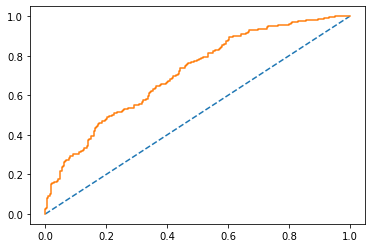

In [173]:
# Now let's check the ROC and AUC 
# predict probabilities
probs_lr = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs_lr)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [174]:
confusion_matrix(y_train,pred_train_lr)

array([[  13,  316],
       [   2, 1720]], dtype=int64)

In [175]:
# lets check for test data
pred_test_lr = model.predict(x_test)
print(classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

           0       0.67      0.01      0.03       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.75      0.51      0.47       879
weighted avg       0.81      0.84      0.77       879



AUC: 0.721


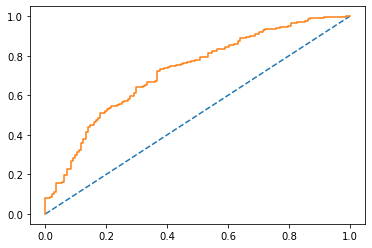

In [176]:
# predict probabilities
probs_test_lr = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_test_lr = probs_test_lr[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs_test_lr)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [177]:
confusion_matrix(y_test,pred_test_lr)

array([[  2, 142],
       [  1, 734]], dtype=int64)

In [178]:
from sklearn.model_selection import GridSearchCV
grid= {'solver':['liblinear', 'newton-cg'],
      'penalty':['l1','l2','none'],'tol':[0.0001,0.000001],
      }

In [179]:
Lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)
grid_search = GridSearchCV(estimator = Lr_model, param_grid = grid, cv = 3,n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-06]})

In [180]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06}

In [181]:
best_lr= grid_search.best_estimator_
best_lr

LogisticRegression(max_iter=10000, n_jobs=-1, solver='liblinear', tol=1e-06)

In [182]:
#prediction for test and train dataset 
ytrain_predict_lr = best_lr.predict(x_train)
ytest_predict_lr = best_lr.predict(x_test)
print(classification_report(y_train,ytrain_predict_lr))
confusion_matrix(y_train,ytrain_predict_lr)

              precision    recall  f1-score   support

           0       0.76      0.34      0.47       329
           1       0.89      0.98      0.93      1722

    accuracy                           0.88      2051
   macro avg       0.82      0.66      0.70      2051
weighted avg       0.87      0.88      0.86      2051



array([[ 111,  218],
       [  35, 1687]], dtype=int64)

In [183]:
# Now lets perform for test data
print(classification_report(y_test,ytest_predict_lr))
confusion_matrix(y_test,ytest_predict_lr)

              precision    recall  f1-score   support

           0       0.69      0.33      0.45       144
           1       0.88      0.97      0.92       735

    accuracy                           0.87       879
   macro avg       0.78      0.65      0.69       879
weighted avg       0.85      0.87      0.85       879



array([[ 48,  96],
       [ 22, 713]], dtype=int64)

AUC: 0.844


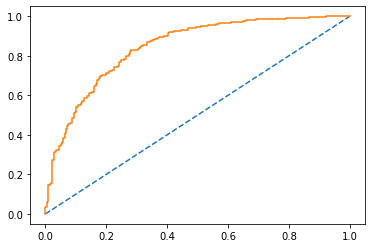

In [184]:
# Now let's check the ROC and AUC 
# predict probabilities
probs_lr = best_lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs_lr)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.843


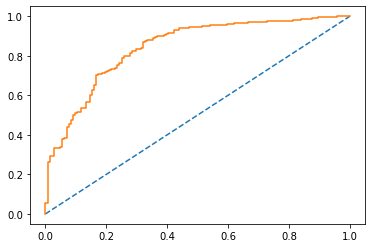

In [185]:
# Let's check ROC and AUC for test dataset
# predict probabilities
probs_test_lr = best_lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_test_lr = probs_test_lr[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs_test_lr)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# LDA model

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [187]:
#lets fit the LDA model to train set
y_pred_lda = ldamodel.predict(x_train)
print(classification_report(y_train, y_pred_lda))
confusion_matrix(y_train,y_pred_lda)

              precision    recall  f1-score   support

           0       0.69      0.39      0.50       329
           1       0.89      0.97      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.79      0.68      0.71      2051
weighted avg       0.86      0.87      0.86      2051



array([[ 127,  202],
       [  57, 1665]], dtype=int64)

,Predict 1,Predict 0
1,127,202
0,57,1665


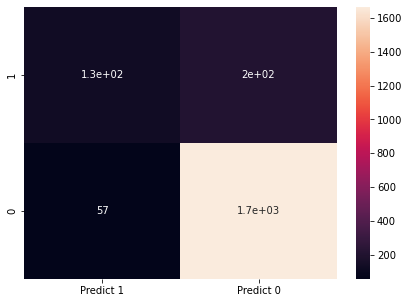

In [188]:
cm=metrics.confusion_matrix(y_train,y_pred_lda, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [189]:
# lets fit the model in testing data
y_pred_test_lda = ldamodel.predict(x_test)
print(classification_report(y_test, y_pred_test_lda))
confusion_matrix(y_test,y_pred_test_lda)

              precision    recall  f1-score   support

           0       0.67      0.33      0.44       144
           1       0.88      0.97      0.92       735

    accuracy                           0.86       879
   macro avg       0.78      0.65      0.68       879
weighted avg       0.85      0.86      0.84       879



array([[ 47,  97],
       [ 23, 712]], dtype=int64)

,Predict 1,Predict 0
1,47,97
0,23,712


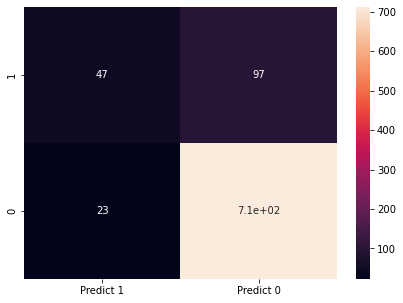

In [190]:
cm=metrics.confusion_matrix(y_test,y_pred_test_lda, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.832


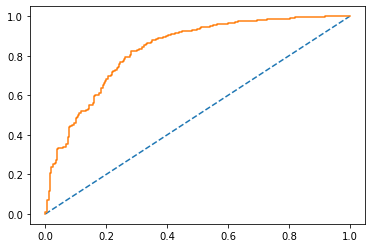

In [191]:
### AUC and ROC for the training data
# predict probabilities
probs_lda = ldamodel.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs_lda)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.850


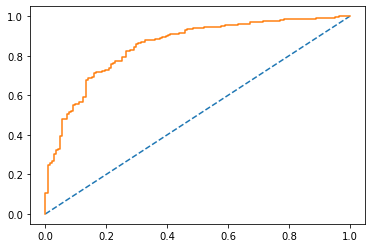

In [192]:
### AUC and ROC for the test data
# predict probabilities
probs_ldatest = ldamodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_ldatest = probs_ldatest[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs_ldatest)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_ldatest)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [193]:
# lets see that hyperparameter can improve our model
best_ldamodel = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
best_ldamodel.fit(x_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [194]:
# Train dataset
ylda_train= best_ldamodel.predict(x_train)
print(classification_report(y_train,ylda_train))
confusion_matrix(y_train,ylda_train)
print(best_ldamodel.score(x_train, y_train))

              precision    recall  f1-score   support

           0       0.72      0.37      0.49       329
           1       0.89      0.97      0.93      1722

    accuracy                           0.88      2051
   macro avg       0.80      0.67      0.71      2051
weighted avg       0.86      0.88      0.86      2051

0.8756704046806436


,Predict 1,Predict 0
1,122,207
0,48,1674


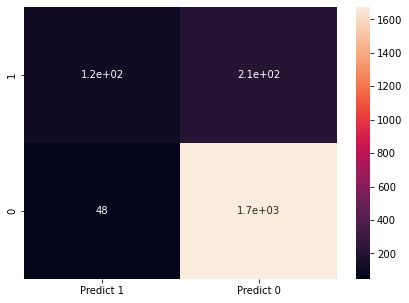

In [195]:
cm_lda=metrics.confusion_matrix(y_train,ylda_train, labels=[0, 1])

df_cm = pd.DataFrame(cm_lda, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [196]:
# Test dataset
ylda_test= best_ldamodel.predict(x_test)
print(classification_report(y_test,ylda_test))
confusion_matrix(y_test,ylda_test)
print(best_ldamodel.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.71      0.35      0.47       144
           1       0.88      0.97      0.93       735

    accuracy                           0.87       879
   macro avg       0.80      0.66      0.70       879
weighted avg       0.86      0.87      0.85       879

0.8703071672354948


,Predict 1,Predict 0
1,51,93
0,21,714


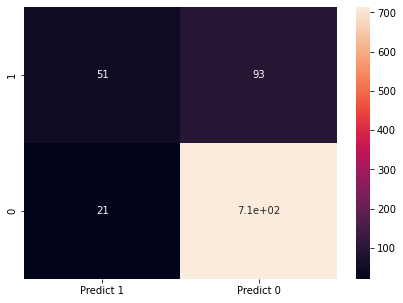

In [197]:
cm_lda_test=metrics.confusion_matrix(y_test,ylda_test, labels=[0, 1])

df_cm = pd.DataFrame(cm_lda_test, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.829


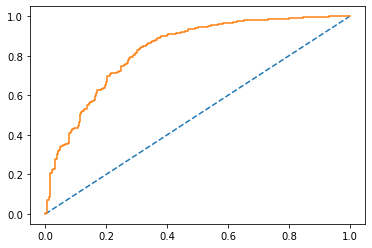

In [198]:
# AUC & ROC curve for best train model
# predict probabilities
probs_train_tune = best_ldamodel.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_train_tune = probs_train_tune[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs_train_tune)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train_tune)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.848


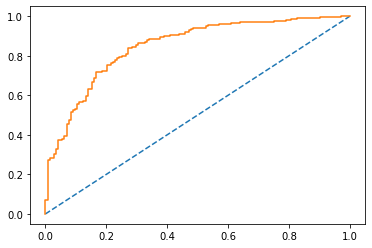

In [199]:
# AUC & ROC curve for best test model
# predict probabilities
probs_test_tune = best_ldamodel.predict_proba(x_test)
probs_test_tune = probs_test_tune[:, 1]
lda_test_auc = roc_auc_score(y_test, probs_test_tune)
print('AUC: %.3f' % lda_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test_tune)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# KNN Model

In [200]:
Y=df2.pop('Result')
X=df2
Xscaled=X.apply(zscore)
Xscaled

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,First_selection,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,...,Opponent_Zimbabwe,Season_Summer,Season_Winter,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
0,-5.052516,0.083177,0.252159,0.803208,-0.750679,-0.617595,-0.600430,0.264714,-1.451878,0.028271,...,-0.242711,1.480446,-0.529183,-0.583393,0.829916,-0.328254,-0.754561,-0.416987,-0.278571,-0.222322
1,-2.362126,0.083177,1.173390,-1.245007,-0.782793,-0.617595,-0.874799,-1.586387,-1.451878,-1.163591,...,4.120129,1.480446,-0.529183,1.714110,-1.204941,-0.328254,-0.754561,-0.416987,-0.278571,-0.222322
2,-2.362126,0.083177,-0.669071,0.803208,-0.683824,1.619184,-0.326060,1.190264,-1.451878,-1.163591,...,4.120129,-0.675472,-0.529183,-0.583393,0.829916,-0.328254,-0.754561,-0.416987,-0.278571,-0.222322
3,-2.362126,-0.907510,-0.669071,0.803208,-0.804543,-0.617595,-0.051690,1.190264,-1.451878,0.028271,...,-0.242711,1.480446,-0.529183,-0.583393,0.829916,-0.328254,-0.754561,-0.416987,-0.278571,-0.222322
4,-2.362126,-1.898197,0.252159,0.803208,-0.680029,-0.617595,-0.874799,1.190264,-1.451878,-1.163591,...,-0.242711,1.480446,-0.529183,-0.583393,0.829916,-0.328254,-0.754561,-0.416987,-0.278571,-0.222322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.328264,0.083177,1.173390,-1.245007,-0.249996,-0.617595,-0.051690,0.264714,-0.418538,-1.163591,...,-0.242711,1.480446,-0.529183,-0.583393,0.829916,-0.328254,1.325274,-0.416987,-0.278571,-0.222322
2926,0.328264,1.073864,0.252159,0.803208,-0.547925,-0.617595,-0.326060,1.190264,-0.418538,0.028271,...,-0.242711,1.480446,-0.529183,1.714110,-1.204941,-0.328254,-0.754561,-0.416987,-0.278571,-0.222322
2927,0.328264,1.073864,0.252159,0.803208,-0.127526,1.619184,-0.326060,1.190264,-0.160203,0.028271,...,-0.242711,-0.675472,-0.529183,-0.583393,0.829916,-0.328254,1.325274,-0.416987,-0.278571,-0.222322
2928,0.328264,1.073864,0.252159,-1.245007,-0.665870,-0.617595,-0.326060,-0.660837,1.131472,0.028271,...,-0.242711,-0.675472,-0.529183,-0.583393,0.829916,-0.328254,-0.754561,-0.416987,-0.278571,-0.222322


In [201]:
from sklearn.neighbors import KNeighborsClassifier
xtrain,xtest,ytrain,ytest= train_test_split(Xscaled,Y,test_size=0.30, random_state=1)
knnmodel = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knnmodel.fit(xtrain,ytrain)

KNeighborsClassifier()

In [203]:
acc_train = []
acc_test = []

for i in np.arange(1,50):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(xtrain, ytrain)
    acc_train.append(knnmodel.score(xtrain,ytrain))
    acc_test.append(knnmodel.score(xtest,ytest))

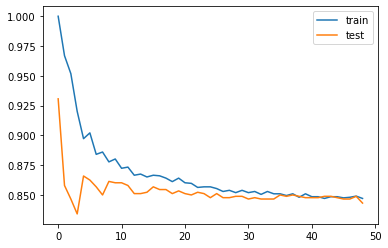

In [204]:
plt.plot(acc_train);
plt.plot(acc_test);
plt.legend(['train','test']);

In [206]:
KNN=pd.DataFrame(data=acc_test, columns=['Test'])
KNN['Train']=pd.DataFrame(data=acc_train)

In [207]:
KNN.head(10)

,Test,Train
0,0.930603,1.000000
1,0.857793,0.966845
2,0.846416,0.951731
3,0.833902,0.920039
4,0.865757,0.897123
5,0.862344,0.901999
6,0.856655,0.883959
7,0.849829,0.885909
8,0.861206,0.877621
9,0.860068,0.880059


In [208]:
# let's for the model on train set
pred_knn_train=knnmodel.predict(xtrain)
print(classification_report(ytrain,pred_knn_train))
confusion_matrix(ytrain,pred_knn_train)
print(knnmodel.score(xtrain, ytrain))

              precision    recall  f1-score   support

           0       0.89      0.05      0.10       329
           1       0.85      1.00      0.92      1722

    accuracy                           0.85      2051
   macro avg       0.87      0.53      0.51      2051
weighted avg       0.85      0.85      0.79      2051

0.8469039492930278


,Predict 1,Predict 0
1,17,312
0,2,1720


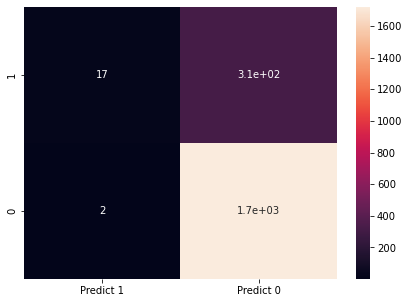

In [308]:
cm=metrics.confusion_matrix(ytrain,pred_knn_train, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [307]:
# lets fit the model for test dataset
pred_knn_test=knnmodel.predict(xtest)
print(classification_report(ytest,pred_knn_test))
confusion_matrix(ytest,pred_knn_test)
print(knnmodel.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.88      0.05      0.09       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.86      0.52      0.50       879
weighted avg       0.85      0.84      0.78       879

0.8430034129692833


,Predict 1,Predict 0
1,7,137
0,1,734


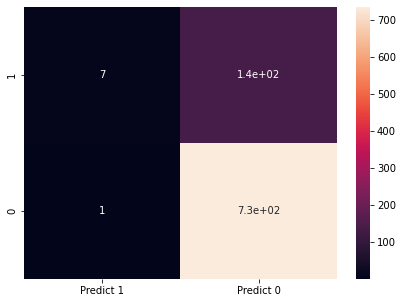

In [309]:
# lets fit the model on test set
cm=metrics.confusion_matrix(ytest,pred_knn_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.824


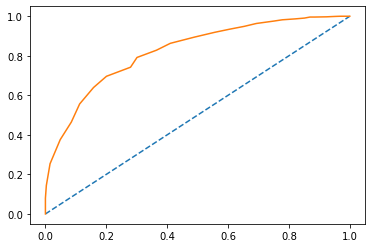

In [210]:
# AUC and ROC curve for train
# predict probabilities
probs_knn_train = knnmodel.predict_proba(xtrain)
# keep probabilities for the positive outcome only
probs_knn_train = probs_knn_train[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(ytrain, probs_knn_train)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(ytrain, probs_knn_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.784


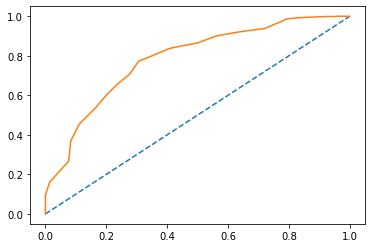

In [211]:
# AUC and ROC curve for test dataset
# predict probabilities
probs_knn_test = knnmodel.predict_proba(xtest)
# keep probabilities for the positive outcome only
probs_knn_test = probs_knn_test[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(ytest, probs_knn_test)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(ytest, probs_knn_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Decision Tree Model

In [212]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [213]:
# lets fit the model on train dataset
y_train_predict_dt = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(metrics.classification_report(y_train, y_train_predict_dt))
print(metrics.confusion_matrix(y_train, y_train_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051

[[ 329    0]
 [   0 1722]]


,Predict 1,Predict 0
1,329,0
0,0,1722


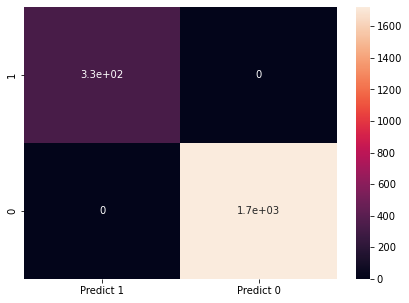

In [214]:
cm=metrics.confusion_matrix(y_train,y_train_predict_dt, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [215]:
# lets fit the model for test dataset
y_dt_predict_test = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(metrics.classification_report(y_test, y_dt_predict_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       144
           1       0.96      0.93      0.94       735

    accuracy                           0.91       879
   macro avg       0.83      0.86      0.84       879
weighted avg       0.91      0.91      0.91       879



,Predict 1,Predict 0
1,113,31
0,49,686


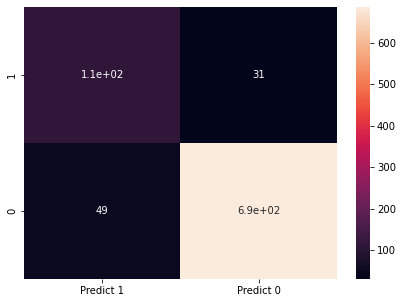

In [216]:
cm=metrics.confusion_matrix(y_test,y_dt_predict_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [217]:
pd.DataFrame(data = DT_model.feature_importances_, columns=['imp'],
             index = x.columns).sort_values(by = 'imp', ascending = False)

,imp
Audience_number,0.177754
player_highest_run,0.097720
Extra_bowls_bowled,0.093063
Season_Summer,0.071020
Max_run_scored_1over,0.059985
Offshore,0.054954
All_rounder_in_team,0.050431
extra_bowls_opponent,0.045109
Max_wicket_taken_1over,0.036960
Min_run_scored_1over,0.036248


Here we can see that our model is overfited.To avoid overfitting we can use purning technique

In [218]:
# Lets build DT model using hyperparameter
from sklearn.tree import DecisionTreeClassifier
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [219]:
# Lets fit the train data on hyperparameter data
y_train_dt = dTreeR.predict(x_train)
print(metrics.classification_report(y_train, y_train_dt))
print(metrics.confusion_matrix(y_train, y_train_dt))

              precision    recall  f1-score   support

           0       0.75      0.17      0.27       329
           1       0.86      0.99      0.92      1722

    accuracy                           0.86      2051
   macro avg       0.81      0.58      0.60      2051
weighted avg       0.84      0.86      0.82      2051

[[  55  274]
 [  18 1704]]


,Predict 1,Predict 0
1,55,274
0,18,1704


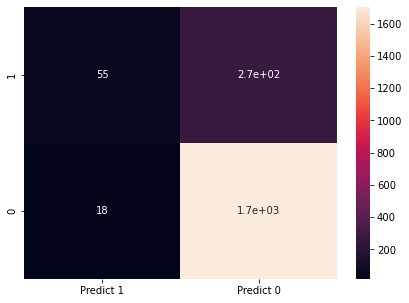

In [220]:
cm=metrics.confusion_matrix(y_train,y_train_dt, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [221]:
# Lets fit the test data on hyperparameter data
y_dt_test = dTreeR.predict(x_test)
print(metrics.classification_report(y_test, y_dt_test))
print(metrics.confusion_matrix(y_test, y_dt_test))

              precision    recall  f1-score   support

           0       0.75      0.12      0.21       144
           1       0.85      0.99      0.92       735

    accuracy                           0.85       879
   macro avg       0.80      0.56      0.57       879
weighted avg       0.84      0.85      0.80       879

[[ 18 126]
 [  6 729]]


,Predict 1,Predict 0
1,18,126
0,6,729


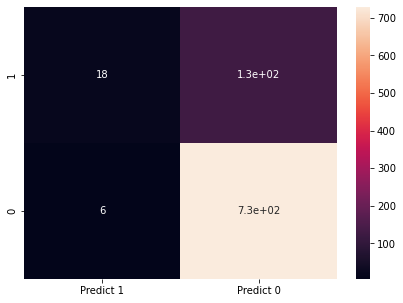

In [222]:
cm=metrics.confusion_matrix(y_test,y_dt_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [223]:
pd.DataFrame(data = dTreeR.feature_importances_, columns=['imp'],
             index = x.columns).sort_values(by = 'imp', ascending = False)

,imp
Extra_bowls_bowled,0.313183
Offshore,0.310110
Audience_number,0.257891
player_highest_run,0.085068
Max_run_given_1over,0.033748
Avg_team_Age,0.000000
Season_Winter,0.000000
Opponent_South Africa,0.000000
Opponent_Srilanka,0.000000
Opponent_West Indies,0.000000


# Random Forest Model

In [224]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [225]:
# Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict))
print(metrics.confusion_matrix(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051

[[ 329    0]
 [   0 1722]]


In [226]:
# Lets for our model on test dataset
y_test_predict = RF_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict))
print(metrics.confusion_matrix(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       144
           1       0.95      0.99      0.97       735

    accuracy                           0.95       879
   macro avg       0.94      0.86      0.89       879
weighted avg       0.95      0.95      0.94       879

[[104  40]
 [  7 728]]


We can see that our RF model is overfitted so we will use hyperparameter for this model

In [227]:
param_grid = {
    'max_depth': [4,6,8],
    'max_features': [4,5,6],
    'min_samples_leaf': [6,8,10],
    'min_samples_split': [45], 
    'n_estimators': [100]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [228]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [45], 'n_estimators': [100]})

In [229]:
best_grid_rf=grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=6,
                       min_samples_split=45, random_state=1)

In [230]:
ytrain_predict_rf = best_grid_rf.predict(x_train)
ytest_predict_rf = best_grid_rf.predict(x_test)

In [231]:
#For train dataset
print(classification_report(y_train,ytrain_predict_rf))
confusion_matrix(y_train,ytrain_predict_rf)

              precision    recall  f1-score   support

           0       0.95      0.19      0.31       329
           1       0.87      1.00      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.91      0.59      0.62      2051
weighted avg       0.88      0.87      0.83      2051



array([[  61,  268],
       [   3, 1719]], dtype=int64)

In [232]:
#For test dataset
print(classification_report(y_test,ytest_predict_rf))
confusion_matrix(y_test,ytest_predict_rf)

              precision    recall  f1-score   support

           0       0.95      0.13      0.23       144
           1       0.85      1.00      0.92       735

    accuracy                           0.86       879
   macro avg       0.90      0.57      0.58       879
weighted avg       0.87      0.86      0.81       879



array([[ 19, 125],
       [  1, 734]], dtype=int64)

# Naive Bayes Model

In [233]:
from sklearn.naive_bayes import GaussianNB
# Let's build model on unscaled data
gnbmodel = GaussianNB()
gnbmodel.fit(x_train, y_train)

GaussianNB()

In [234]:
# For Train dataset
predNB_train = gnbmodel.predict(x_train)
print(classification_report(y_train, predNB_train))
confusion_matrix(y_train, predNB_train)

              precision    recall  f1-score   support

           0       0.34      0.38      0.36       329
           1       0.88      0.86      0.87      1722

    accuracy                           0.78      2051
   macro avg       0.61      0.62      0.61      2051
weighted avg       0.79      0.78      0.79      2051



array([[ 125,  204],
       [ 242, 1480]], dtype=int64)

,Predict 1,Predict 0
1,125,204
0,242,1480


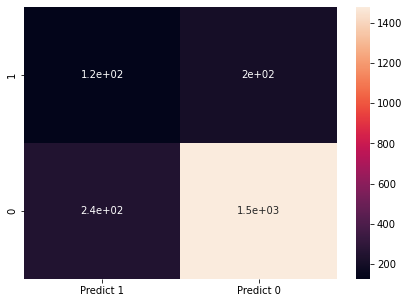

In [235]:
cm=metrics.confusion_matrix(y_train, predNB_train, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [236]:
# For test dataset
predNB_test = gnbmodel.predict(x_test)
print(classification_report(y_test, predNB_test))
confusion_matrix(y_test, predNB_test)

              precision    recall  f1-score   support

           0       0.41      0.42      0.41       144
           1       0.89      0.88      0.88       735

    accuracy                           0.81       879
   macro avg       0.65      0.65      0.65       879
weighted avg       0.81      0.81      0.81       879



array([[ 60,  84],
       [ 87, 648]], dtype=int64)

,Predict 1,Predict 0
1,60,84
0,87,648


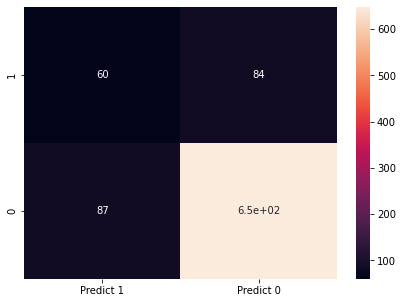

In [237]:
cm=metrics.confusion_matrix(y_test, predNB_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [239]:
# Fitting the Model on scaled dataset
gnbmodel_scl = GaussianNB()
gnbmodel_scl.fit(xtrain, ytrain)

GaussianNB()

In [241]:
# For train dataset
predNB_train_scal = gnbmodel_scl.predict(xtrain)
print(classification_report(ytrain, predNB_train_scal))
confusion_matrix(ytrain, predNB_train_scal)

              precision    recall  f1-score   support

           0       0.25      0.84      0.38       329
           1       0.94      0.51      0.66      1722

    accuracy                           0.56      2051
   macro avg       0.60      0.68      0.52      2051
weighted avg       0.83      0.56      0.62      2051



array([[277,  52],
       [842, 880]], dtype=int64)

,Predict 1,Predict 0
1,277,52
0,842,880


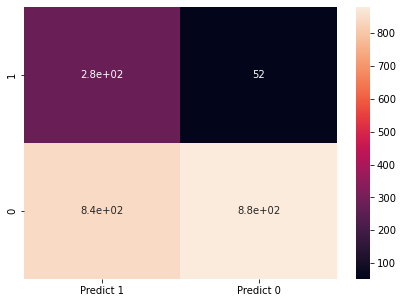

In [242]:
cm=metrics.confusion_matrix(ytrain, predNB_train_scal, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [244]:
# For test Dataset
predNB_test_scal = gnbmodel_scl.predict(xtest)
print(classification_report(ytest, predNB_test_scal))
confusion_matrix(ytest, predNB_test_scal)

              precision    recall  f1-score   support

           0       0.25      0.83      0.39       144
           1       0.94      0.52      0.67       735

    accuracy                           0.57       879
   macro avg       0.60      0.68      0.53       879
weighted avg       0.83      0.57      0.62       879



array([[120,  24],
       [354, 381]], dtype=int64)

,Predict 1,Predict 0
1,120,24
0,354,381


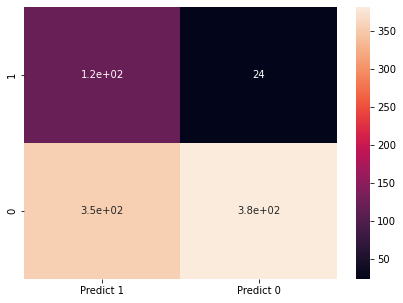

In [245]:
cm=metrics.confusion_matrix(ytest, predNB_test_scal, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# Neural Network Model

In [247]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(random_state=1)
model_nn.fit(x_train,y_train)

MLPClassifier(random_state=1)

In [248]:
ytrain_predict_nn = model_nn.predict(x_train)
ytest_predict_nn = model_nn.predict(x_test)

In [250]:
# For train dataset
print(classification_report(y_train,ytrain_predict_nn))
confusion_matrix(y_train,ytrain_predict_nn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.84      1.00      0.91      1722

    accuracy                           0.84      2051
   macro avg       0.42      0.50      0.46      2051
weighted avg       0.70      0.84      0.77      2051



array([[   0,  329],
       [   0, 1722]], dtype=int64)

,Predict 1,Predict 0
1,0,329
0,0,1722


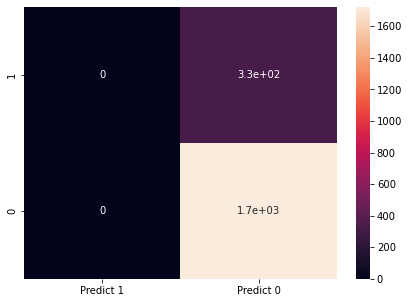

In [251]:
cm=metrics.confusion_matrix(y_train, ytrain_predict_nn, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [252]:
# For test dataset
print(classification_report(y_test,ytest_predict_nn))
confusion_matrix(y_test,ytest_predict_nn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.42      0.50      0.46       879
weighted avg       0.70      0.84      0.76       879



array([[  0, 144],
       [  0, 735]], dtype=int64)

,Predict 1,Predict 0
1,0,144
0,0,735


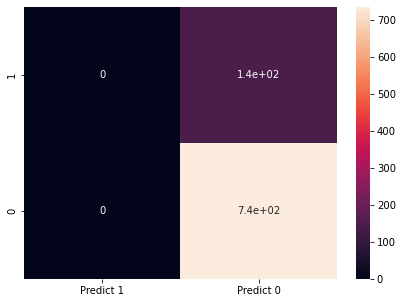

In [253]:
cm=metrics.confusion_matrix(y_test, ytest_predict_nn, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [254]:
# Fitting Neural Network on scaled data
model_nn_scl = MLPClassifier(random_state=1)
model_nn_scl.fit(xtrain,ytrain)

MLPClassifier(random_state=1)

In [255]:
ytrain_predict_nn_scl = model_nn.predict(xtrain)
ytest_predict_nn_scl = model_nn.predict(xtest)

In [257]:
# For train dataset
print(classification_report(ytrain,ytrain_predict_nn_scl))
confusion_matrix(ytrain,ytrain_predict_nn_scl)

              precision    recall  f1-score   support

           0       0.23      0.91      0.36       329
           1       0.96      0.41      0.57      1722

    accuracy                           0.49      2051
   macro avg       0.59      0.66      0.47      2051
weighted avg       0.84      0.49      0.54      2051



array([[ 298,   31],
       [1020,  702]], dtype=int64)

,Predict 1,Predict 0
1,298,31
0,1020,702


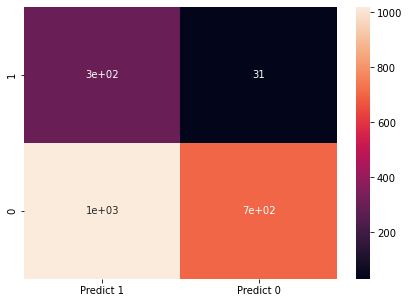

In [258]:
cm=metrics.confusion_matrix(ytrain,ytrain_predict_nn_scl, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [259]:
# For Test dataset
print(classification_report(ytest,ytest_predict_nn_scl))
confusion_matrix(ytest,ytest_predict_nn_scl)

              precision    recall  f1-score   support

           0       0.25      0.92      0.39       144
           1       0.97      0.46      0.62       735

    accuracy                           0.53       879
   macro avg       0.61      0.69      0.51       879
weighted avg       0.85      0.53      0.58       879



array([[132,  12],
       [398, 337]], dtype=int64)

,Predict 1,Predict 0
1,132,12
0,398,337


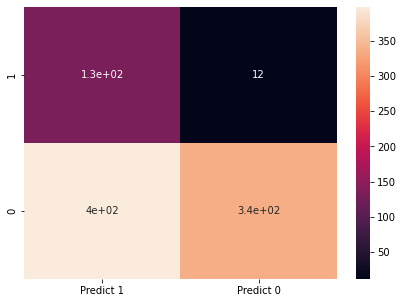

In [260]:
cm=metrics.confusion_matrix(ytest,ytest_predict_nn_scl, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# Ensemble modeling Method
## Bagging method

In [261]:
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(base_estimator=best_grid_rf,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        max_features=6,
                                                        min_samples_leaf=6,
                                                        min_samples_split=45,
                                                        random_state=1),
                  random_state=1)

In [262]:
# Lets build model for train dataset
y_train_predict_bg = Bagging_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_bg))
print(metrics.confusion_matrix(y_train, y_train_predict_bg))

              precision    recall  f1-score   support

           0       0.94      0.09      0.17       329
           1       0.85      1.00      0.92      1722

    accuracy                           0.85      2051
   macro avg       0.89      0.55      0.54      2051
weighted avg       0.87      0.85      0.80      2051

[[  30  299]
 [   2 1720]]


,Predict 1,Predict 0
1,30,299
0,2,1720


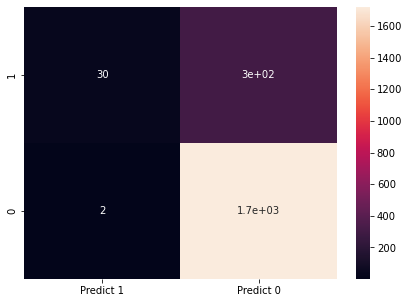

In [263]:
cm=metrics.confusion_matrix(y_train, y_train_predict_bg, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.900


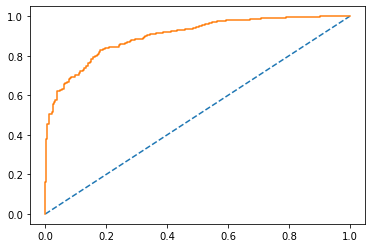

In [264]:
# AUC and ROC For Train
# predict probabilities
probs_train = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
rfb_train_auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % rfb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [265]:
# For Test dataset
y_test_predict_bg = Bagging_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_bg))
print(metrics.confusion_matrix(y_test, y_test_predict_bg))

              precision    recall  f1-score   support

           0       1.00      0.08      0.14       144
           1       0.85      1.00      0.92       735

    accuracy                           0.85       879
   macro avg       0.92      0.54      0.53       879
weighted avg       0.87      0.85      0.79       879

[[ 11 133]
 [  0 735]]


,Predict 1,Predict 0
1,11,133
0,0,735


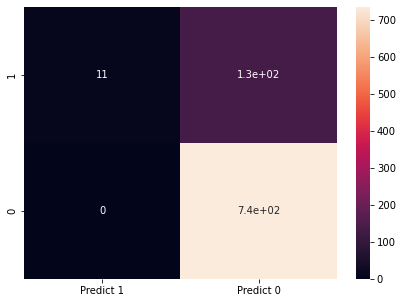

In [266]:
cm=metrics.confusion_matrix(y_test, y_test_predict_bg, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.870


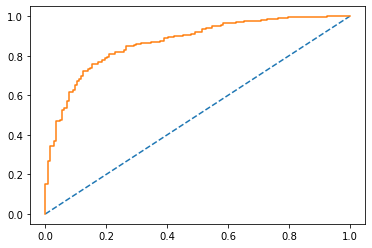

In [267]:
# AUC and ROC for test
# predict probabilities
probs_test_bg = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_test_bg = probs_test_bg[:, 1]
# calculate AUC
rfb_test_auc = roc_auc_score(y_test, probs_test_bg)
print('AUC: %.3f' % rfb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test_bg)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## ADA Boost Method

In [268]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [269]:
# For train dataset
y_train_predict_ada = ADB_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_ada))
print(metrics.confusion_matrix(y_train, y_train_predict_ada))

              precision    recall  f1-score   support

           0       0.78      0.39      0.52       329
           1       0.89      0.98      0.93      1722

    accuracy                           0.88      2051
   macro avg       0.84      0.68      0.73      2051
weighted avg       0.87      0.88      0.87      2051

[[ 127  202]
 [  36 1686]]


,Predict 1,Predict 0
1,127,202
0,36,1686


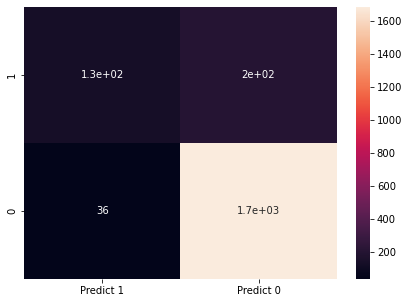

In [270]:
cm=metrics.confusion_matrix(y_train, y_train_predict_ada, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.876


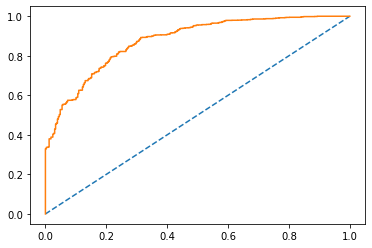

In [271]:
# AUC and ROC for train dataset
# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [272]:
# For Test dataset
y_test_predict_ada = ADB_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_ada))
print(metrics.confusion_matrix(y_test, y_test_predict_ada))

              precision    recall  f1-score   support

           0       0.70      0.33      0.45       144
           1       0.88      0.97      0.92       735

    accuracy                           0.87       879
   macro avg       0.79      0.65      0.69       879
weighted avg       0.85      0.87      0.85       879

[[ 48  96]
 [ 21 714]]


,Predict 1,Predict 0
1,48,96
0,21,714


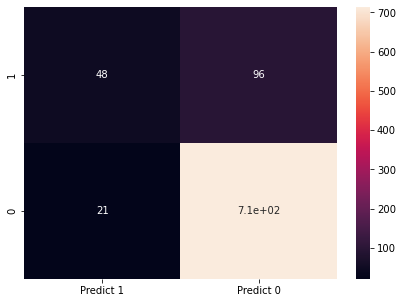

In [273]:
cm=metrics.confusion_matrix(y_test, y_test_predict_ada, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.848


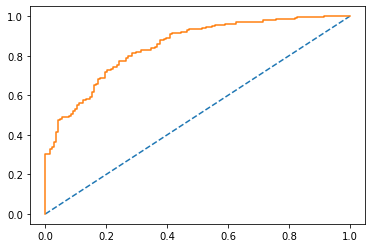

In [274]:
# AUC and ROC for test dataset
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

## Gradient boosting method


In [276]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [277]:
# For train Dataset
y_train_predict_gb = gbcl.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_gb))
print(metrics.confusion_matrix(y_train, y_train_predict_gb))

              precision    recall  f1-score   support

           0       0.96      0.57      0.71       329
           1       0.92      1.00      0.96      1722

    accuracy                           0.93      2051
   macro avg       0.94      0.78      0.84      2051
weighted avg       0.93      0.93      0.92      2051

[[ 187  142]
 [   8 1714]]


,Predict 1,Predict 0
1,187,142
0,8,1714


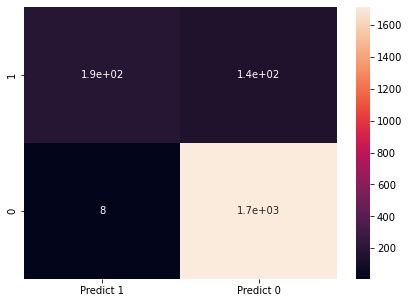

In [278]:
cm=metrics.confusion_matrix(y_train, y_train_predict_gb, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.962


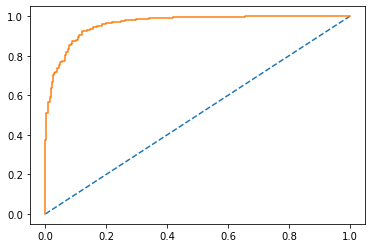

In [279]:
# ROC and AUC for train
# predict probabilities
probs_gb = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_gb = probs_gb[:, 1]
# calculate AUC
gb_train_auc = roc_auc_score(y_train, probs_gb)
print('AUC: %.3f' % gb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_gb)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [280]:
# For Test dataset
y_test_predict_gb = gbcl.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_gb))
print(metrics.confusion_matrix(y_test, y_test_predict_gb))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59       144
           1       0.90      0.99      0.94       735

    accuracy                           0.90       879
   macro avg       0.89      0.71      0.76       879
weighted avg       0.90      0.90      0.88       879

[[ 63  81]
 [  8 727]]


,Predict 1,Predict 0
1,63,81
0,8,727


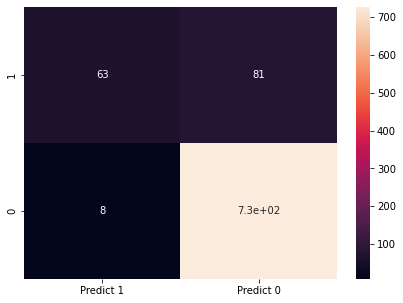

In [281]:
cm=metrics.confusion_matrix(y_test, y_test_predict_gb, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.894


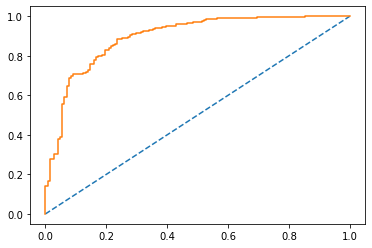

In [282]:
# ROC and AUC for test dataset
probs_gb = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_gb = probs_gb[:, 1]
# calculate AUC
gb_test_auc = roc_auc_score(y_test, probs_gb)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs_gb)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [283]:
# Smote
y.value_counts()

1    2457
0     473
Name: Result, dtype: int64

In [284]:
# Here we can see data imbalance in the data so we will oversampling technique to check the performance of the model
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_res, Y_train_res = sm.fit_resample(x_train, y_train)
Y_train_res.value_counts()

1    1722
0    1722
Name: Result, dtype: int64

## RF with SMOTE


In [286]:
# For Train dataset
rfmodel_SM=best_grid_rf.fit(X_train_res,Y_train_res)
pred_rf_SM_train= rfmodel_SM.predict(X_train_res)
print(classification_report(Y_train_res,pred_rf_SM_train))
confusion_matrix(Y_train_res,pred_rf_SM_train)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1722
           1       0.90      0.96      0.93      1722

    accuracy                           0.93      3444
   macro avg       0.93      0.93      0.93      3444
weighted avg       0.93      0.93      0.93      3444



array([[1530,  192],
       [  64, 1658]], dtype=int64)

,Predict 1,Predict 0
1,1530,192
0,64,1658


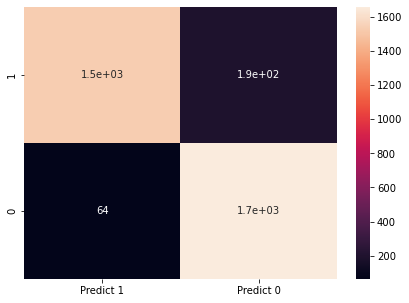

In [287]:
cm=metrics.confusion_matrix(Y_train_res,pred_rf_SM_train, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.980


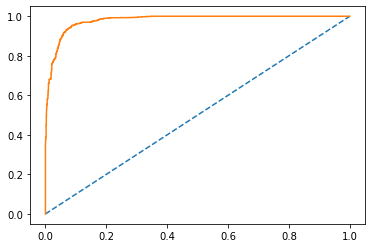

In [288]:
probs_sm = rfmodel_SM.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs_sm = probs_sm[:, 1]
# calculate AUC
sm_train_auc = roc_auc_score(Y_train_res, probs_sm)
print('AUC: %.3f' % sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train_res, probs_sm)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [289]:
#For Test dataset
pred_rf_SM_test= rfmodel_SM.predict(x_test)
print(classification_report(y_test,pred_rf_SM_test))
confusion_matrix(y_test,pred_rf_SM_test)

              precision    recall  f1-score   support

           0       0.60      0.45      0.52       144
           1       0.90      0.94      0.92       735

    accuracy                           0.86       879
   macro avg       0.75      0.70      0.72       879
weighted avg       0.85      0.86      0.85       879



array([[ 65,  79],
       [ 43, 692]], dtype=int64)

,Predict 1,Predict 0
1,65,79
0,43,692


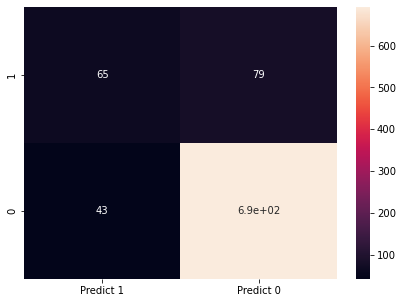

In [290]:
cm=metrics.confusion_matrix(y_test,pred_rf_SM_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.842


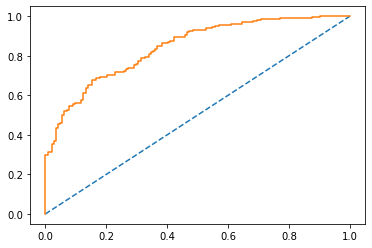

In [291]:
probs_sm_test = rfmodel_SM.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_sm_test = probs_sm_test[:, 1]
# calculate AUC
sm_test_auc = roc_auc_score(y_test, probs_sm_test)
print('AUC: %.3f' % sm_test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs_sm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

## Smote on KNN

In [292]:
X_train_res_scl= X_train_res.apply(zscore)
knnmodel_SM= KNeighborsClassifier(n_neighbors=5, weights='uniform')
knnmodel_SM.fit(X_train_res_scl,Y_train_res)

KNeighborsClassifier()

In [293]:
# For Train dataset
pred_knn_SM=knnmodel_SM.predict(X_train_res_scl)
print(classification_report(Y_train_res,pred_knn_SM))
print(confusion_matrix(Y_train_res,pred_knn_SM))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1722
           1       0.96      0.89      0.93      1722

    accuracy                           0.93      3444
   macro avg       0.93      0.93      0.93      3444
weighted avg       0.93      0.93      0.93      3444

[[1663   59]
 [ 184 1538]]


,Predict 1,Predict 0
1,1663,59
0,184,1538


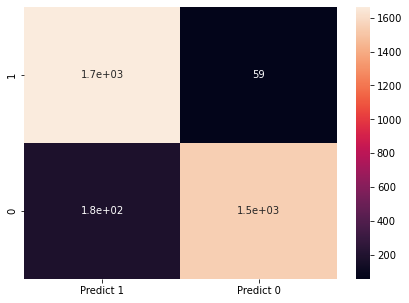

In [294]:
cm=metrics.confusion_matrix(Y_train_res,pred_knn_SM, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.990


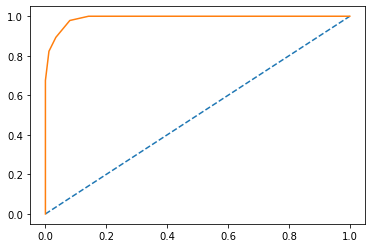

In [295]:
probs_sm = knnmodel_SM.predict_proba(X_train_res_scl)
# keep probabilities for the positive outcome only
probs_sm = probs_sm[:, 1]
# calculate AUC
sm_train_auc = roc_auc_score(Y_train_res, probs_sm)
print('AUC: %.3f' % sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train_res, probs_sm)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [297]:
# For test dataset
pred_knn_SM_test=knnmodel_SM.predict(xtest)
print(classification_report(ytest,pred_knn_SM_test))
print(confusion_matrix(ytest,pred_knn_SM_test))

              precision    recall  f1-score   support

           0       0.41      0.73      0.53       144
           1       0.94      0.79      0.86       735

    accuracy                           0.78       879
   macro avg       0.67      0.76      0.69       879
weighted avg       0.85      0.78      0.81       879

[[105  39]
 [151 584]]


,Predict 1,Predict 0
1,105,39
0,151,584


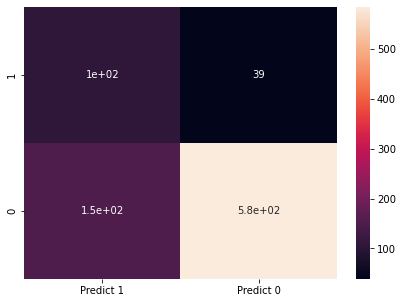

In [298]:
cm=metrics.confusion_matrix(ytest,pred_knn_SM_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.847


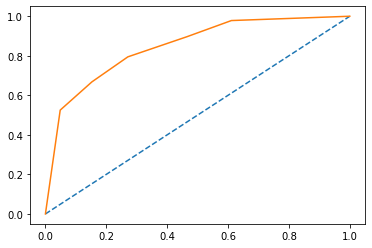

In [299]:
# AUC and ROC for test 
# predict probabilities
probs_knntest = knnmodel_SM.predict_proba(xtest)
# keep probabilities for the positive outcome only
probs_knntest = probs_knntest[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(ytest, probs_knntest)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(ytest, probs_knntest)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [300]:
grid_GD= {'n_estimators':[40,50,60],
      'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],'loss':['deviance','exponential'],'max_features':[6,7,8],'min_samples_leaf':[30,40,50]
      }
grid_search_GD= GridSearchCV(estimator=gbcl, param_grid=grid_GD, cv=3,n_jobs=2)

In [301]:
grid_search_GD.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=2,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['deviance', 'exponential'],
                         'max_features': [6, 7, 8],
                         'min_samples_leaf': [30, 40, 50],
                         'n_estimators': [40, 50, 60]})

In [303]:
grid_search_GD.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_features': 7,
 'min_samples_leaf': 40,
 'n_estimators': 60}

In [304]:
best_GDmodel= grid_search_GD.best_estimator_
best_GDmodel

GradientBoostingClassifier(loss='deviance', max_features=7, min_samples_leaf=40,
                           n_estimators=60, random_state=1)

In [305]:
y_train_predict_gb = best_GDmodel.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_gb))
print(metrics.confusion_matrix(y_train, y_train_predict_gb))

              precision    recall  f1-score   support

           0       0.88      0.35      0.50       329
           1       0.89      0.99      0.94      1722

    accuracy                           0.89      2051
   macro avg       0.88      0.67      0.72      2051
weighted avg       0.89      0.89      0.87      2051

[[ 116  213]
 [  16 1706]]


In [306]:
y_test_predict_gb = best_GDmodel.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_gb))
print(metrics.confusion_matrix(y_test, y_test_predict_gb))

              precision    recall  f1-score   support

           0       0.80      0.27      0.40       144
           1       0.87      0.99      0.93       735

    accuracy                           0.87       879
   macro avg       0.83      0.63      0.67       879
weighted avg       0.86      0.87      0.84       879

[[ 39 105]
 [ 10 725]]
